<a href="https://colab.research.google.com/github/sammed97/face_emotion_recognition/blob/main/Team_Individual_Notebook_face_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Emotion Recognition- Individual Capstone Project**

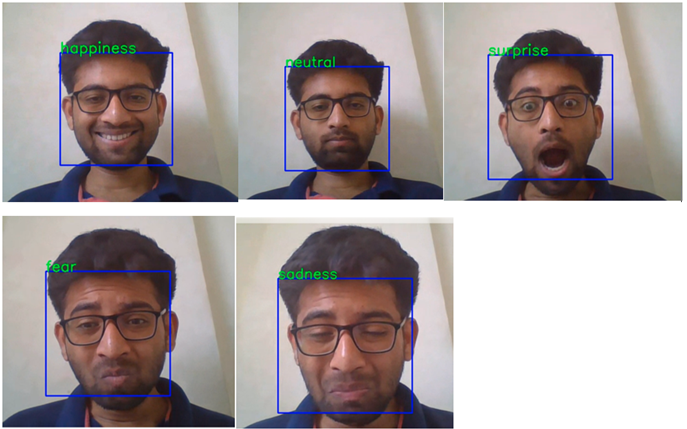

## **Understanding The Problem**

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.
Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms. One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.
In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms. Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked

## **What is our task?**

We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.
The solution to this problem is by recognizing facial emotions.

## **Approach-**
1. Getting Dataset
2. Understanding Dataset
3. EDA
4. Data Preprocessing
5. Model Selection and Training
6. Model Evaluation/Testing
7. Plotting Loss-Accuracy
8. Testing the model using live web cam
9. Conclusion

### **Importing Required Libraries**

In [ ]:
#Importing the libraries
import pandas as pd  # Pandas
import cv2     # Opencv
import numpy as np    # Numpy
import matplotlib.pyplot as plt  # Matplotlib 
import seaborn as sns    # Seaborn
import warnings
import os
import tensorflow as tf   # Tensorflow
from tensorflow import keras  # Keras
 
warnings.filterwarnings(action='ignore')

#Importing Libraires required for CNN models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping,ReduceLROnPlateau,Callback
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Flatten,Dense, Dropout, Activation, Flatten,Conv2D, MaxPooling2D, SeparableConv2D,Input, GlobalAveragePooling2D,concatenate
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.regularizers import l2
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report,roc_curve, roc_auc_score,confusion_matrix
from tensorflow.keras.applications.mobilenet import MobileNet  # MobileNet


**Mounting Google Drive**

In [ ]:
# Mounting google drive to fetch the data in it
from google.colab import drive
drive.mount('/content/drive')

## **Dataset:-**
I used a dataset named FER-2013 from kaggle. The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 3,589 examples.

I used the dataset in CSV format.

In [ ]:
# loading dataset from google drive to this notebook
df = pd.read_csv("/content/drive/MyDrive/fer 2013/fer2013.csv")

## **Understanding the Dataset**

In [ ]:
# Exploring first 5 rows of our dataset
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
# Last 5 rows 
df.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


**Fetching no. of rows and columns**

In [ ]:
# fetching 
print('No.of Images:',df.shape[0], "\n"
      'No. of Columns:',df.shape[1])

No.of Images: 35887 
No. of Columns: 3


**Info**

In [ ]:
# Getting Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


**Missing Values**

In [ ]:
# Checking for missing values using isnull and sum
df.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

We dont have any null values in our dataset

## **Exploratory Data Aanalysis**

**Emotions**

In [ ]:
# Checking unique values in our 
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

**We have 7 different emotions ranging from 0 to 6 as following:** 

**0- Anger**

**1- Disgust**

**2- Fear**

**3- Happiness**

**4- Sadness**

**5- Surprise**

**6- Neutral**

In [ ]:
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

**Here we have highest no. of images for 'Happiness' and very negligible no. of images for 'Disgust'.**

In [ ]:
#lable of different emotion
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

### **Plotting the images for every Emotion**

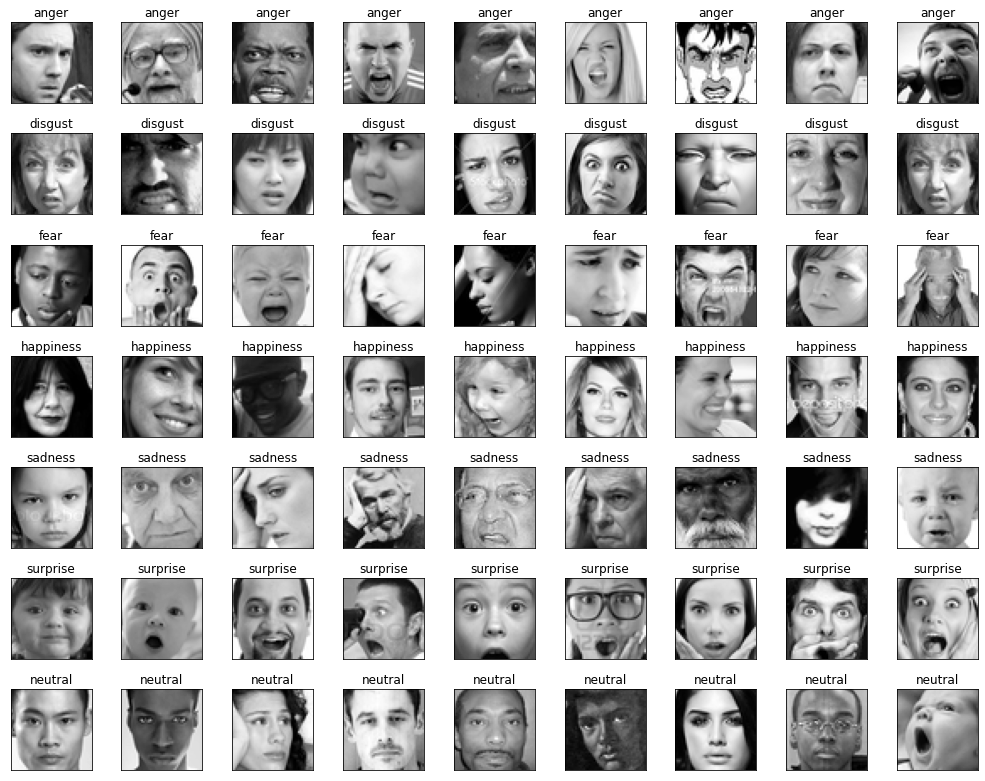

In [ ]:
# size of the image: 48*48 pixels

fig = plt.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(9):    # We will plot 9 images for each emotion we have
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(9, 9, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()    # Plotting using matplotlib

In above grid we can see what kind of images we are having for each emotion.

###**Countplot for Emotions**

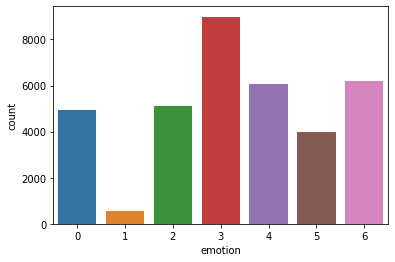

In [ ]:
#plot for value count
sns.countplot(df.emotion)
plt.show()

We have fair amount of images for every emotion except 'Disgust'

### **Emotions Pie-Chart**

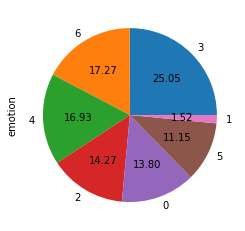

In [ ]:
# we will plot a pie-chart to see the percentage wise distribution of images in each type
df['emotion'].value_counts().plot(kind='pie',autopct="%.2f")

### **we have** :-
**Happiness: 25.05%**

**Neutral: 17.27%**

**Sadness: 16.93%**

**Fear: 14.27%**

**Anger: 13.80%**

**Surprise: 11.15%**

**Disgust: 1.52%**

### **Data Split**

In [ ]:
# Checking data split
df.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

**Pie-chart for data splitting**

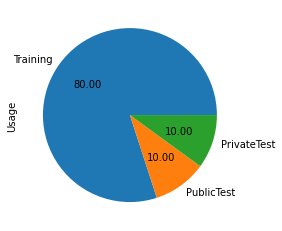

In [ ]:
# Plotting a pie chart to get percentage wise distribution
df['Usage'].value_counts().plot(kind='pie',autopct="%.2f")

**Here we have 80% data is for training and 20% for testing**

# **Data Preprocessing**

### **Image pre-processing**

We will create an Convolutional Neural Network(CNN) for this task and then we will feed batches of 48x48x1 gray-scaled images. But the current data we have is not in that format, so we need to make the data compatible for our model otherwise it will crash even before it start learning.

Convert the images into numpy arrays using opencv and make output as categorical using pandas.

In [ ]:
#Image preprocessing
df['pixels']=df['pixels'].astype("string")
pixels = df['pixels'].tolist()
width, height = 48, 48
faces = []
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.strip().split(' ',48*48)]
    face = np.asarray(face).reshape(width, height)
    face = cv2.resize(face.astype('uint8'),image_size)
    faces.append(face.astype('float32'))
faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)
faces /= 127.5
faces -= 1.
emotions = pd.get_dummies(df['emotion']).to_numpy()

scaling the pixels between -1 and 1.



### **Splitting the data into Train-Test-Validation**

In [ ]:
#Dataset split for training model 
X_train, X_valid, y_train, y_valid = train_test_split(faces,emotions,
                                                    shuffle=True,
                                                    test_size=0.2, random_state=42)
X_valid,X_test,y_valid,y_test=train_test_split(faces,emotions,test_size=0.2,shuffle=True)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape,X_test.shape,y_test.shape

((28709, 48, 48, 1),
 (28709, 48, 48, 1),
 (28709, 7),
 (28709, 7),
 (7178, 48, 48, 1),
 (7178, 7))

In [ ]:
#variable allocation
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

### **Data Augmentation**

In Data Augmentation we take each batch and apply some series of random transformations (random rotation, resizing, shearing) to increase generalizabilty of the model.

In [ ]:
#data augmentation such as rotate images,shift images,flip and zoom into images 
train_datagen = ImageDataGenerator(
    rotation_range=15,         
    width_shift_range=0.15,    
    height_shift_range=0.15,   
    shear_range=0.15,
    zoom_range=0.15,           
    horizontal_flip=True,      
)
train_datagen.fit(X_train)

###**Defining Parameters**

We will define the parameters required for training the model.

In [ ]:
# Defining the parameters
batch_size = 32
num_epochs = 100
input_shape = (48, 48, 1)
validation_split = .2
verbose = 1
num_classes = 7
base_path = 'models/'
shape_x = 48
shape_y = 48
image_size=(48,48)

## **Model Building**

### **MobileNet**

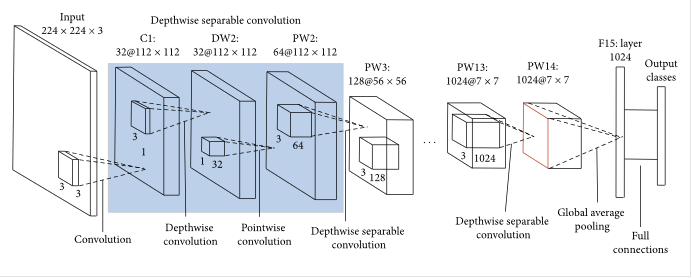

**What is MobileNet?**

As the name applied, the MobileNet model is designed to be used in mobile applications, and it is TensorFlow’s first mobile computer vision model.
MobileNet uses depthwise separable convolutions. It significantly reduces the number of parameters when compared to the network with regular convolutions with the same depth in the nets. This results in lightweight deep neural networks.
A depthwise separable convolution is made from two operations.

This function returns a Keras image classification model, optionally loaded with weights pre-trained on ImageNet.

MobileNet is a class of CNN that was open-sourced by Google, and therefore, this gives us an excellent starting point for training our classifiers that are insanely small and insanely fast.

In [ ]:
#defining input_shape,weights and classes for mobilenet model
MobileNet = MobileNet(input_shape=[48,48]+ [1], weights=None, include_top=True,classes=7)

In [ ]:
#inputs and outputs defining as a mobileNet variable which is defined in previous cell
mobile_model = Model(inputs=MobileNet.input, outputs=MobileNet.output)

In [ ]:
#optimizers,loss and metrics for mobileNet model 
optim =optimizers.Adam(learning_rate=0.01) 
mobile_model.compile(optimizer=optim,loss='categorical_crossentropy', metrics=['accuracy'])

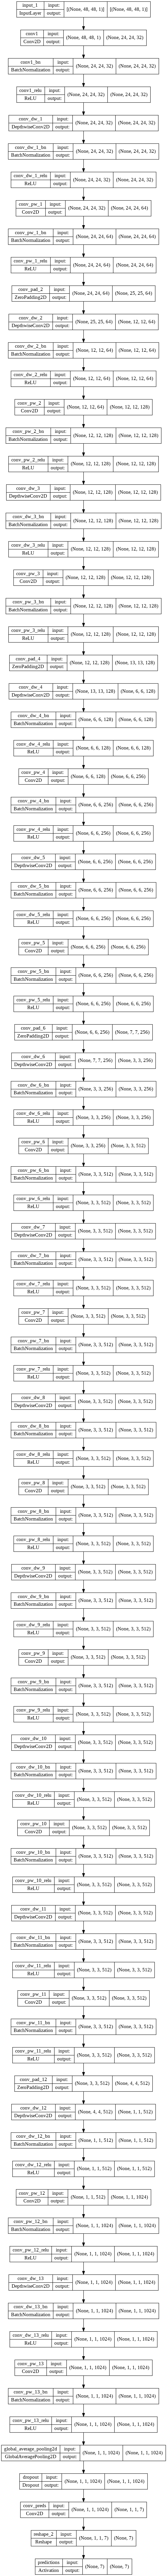

In [ ]:
#plot for architechture
plot_model(mobile_model, to_file='mobile_net.png', show_shapes=True, show_layer_names=True)

**Compiling Model**

In [ ]:
#model compilation
mobile_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv1 (Conv2D)              (None, 24, 24, 32)        288       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 24, 24, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 24, 24, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 24, 24, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 24, 24, 32)       128       
 ation)                                                      

### **Training- MobileNet**

In [ ]:
#parameters for training the model
early_stop = EarlyStopping('val_loss', patience=100)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=50, min_lr=0.00001,model='auto')
trained_models_path = base_path + 'mobilenet'
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

We will train the model for 100 epochs and batch size of 32.

I ran the model on google colab GPU.

In [ ]:
#model history for further evaluation the performance
mobile_history =mobile_model.fit(train_datagen.flow(X_train, y_train, batch_size),
          steps_per_epoch=len(X_train) / batch_size, 
          epochs=num_epochs, 
          verbose=1, 
          callbacks=callbacks,
          validation_data=(X_valid,y_valid))

Epoch 1/100
898/897 [==============================] - ETA: 0s - loss: 1.9432 - accuracy: 0.2460
Epoch 1: val_loss improved from inf to 1.75822, saving model to models/mobilenet.01-0.28.hdf5
897/897 [==============================] - 52s 44ms/step - loss: 1.9432 - accuracy: 0.2460 - val_loss: 1.7582 - val_accuracy: 0.2787 - lr: 0.0100
Epoch 2/100
897/897 [============================>.] - ETA: 0s - loss: 1.7535 - accuracy: 0.2833
Epoch 2: val_loss did not improve from 1.75822
897/897 [==============================] - 38s 42ms/step - loss: 1.7534 - accuracy: 0.2833 - val_loss: 1.7803 - val_accuracy: 0.2461 - lr: 0.0100
Epoch 3/100
897/897 [============================>.] - ETA: 0s - loss: 1.7657 - accuracy: 0.2738
Epoch 3: val_loss did not improve from 1.75822
897/897 [==============================] - 40s 44ms/step - loss: 1.7657 - accuracy: 0.2737 - val_loss: 1.7766 - val_accuracy: 0.2445 - lr: 0.0100
Epoch 4/100
898/897 [==============================] - ETA: 0s - loss: 1.7079 - acc

**Here we get the accuracy 0.6297 means approximately 63% with 0.0100 learning rate.**

Now we will try a custom CNN model.

# **CNN**

The convolutional neural network, or CNN for short, is a specialized type of neural network model designed for working with two-dimensional image data, although they can be used with one-dimensional and three-dimensional data.
Central to the convolutional neural network is the convolutional layer that gives the network its name. This layer performs an operation called a convolution.

Here I am using keras with tensorflow as back-end for building Neural Networks.

**The layers to be added are:-**

1.Convolution layer

2.Pooling layer

3.Batch normalization

4.Activation Layer

5.Dropout Layer

6.Flatten Layer

7.Dense layer

In [ ]:
# Building up Model Architecture
def CNN():
    model = Sequential()

    #1st CNN layer
    model.add(Conv2D(64,(3,3),padding = 'same', name='image_array', input_shape = (48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    #2nd CNN layer
    model.add(Conv2D(128,(5,5),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

    #3rd CNN layer
    model.add(Conv2D(512,(3,3),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

    #4th CNN layer
    model.add(Conv2D(512,(3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    #Fully connected 1st layer
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))


    # Fully connected layer 2nd layer
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(num_classes, activation='softmax'))

    return model

**Convolution** is a linear operation that involves the multiplication of a set of weights with the input, much like a traditional neural network. Given that the technique was designed for two-dimensional input, the multiplication is performed between an array of input data and a two-dimensional array of weights, called a filter or a kernel.

**Batch normalization** allows each layer of a network to learn by itself a little bit more independently of other layers.

In a neural network, the **activation function** is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input.

The **Rectified linear activation(ReLu)** function is a piece-wise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

A **pooling layer** is another building block of a CNN. Its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network. Pooling layer operates on each feature map independently.

In [ ]:
#model name
CNN=CNN()

**Architecture of Defined Model**

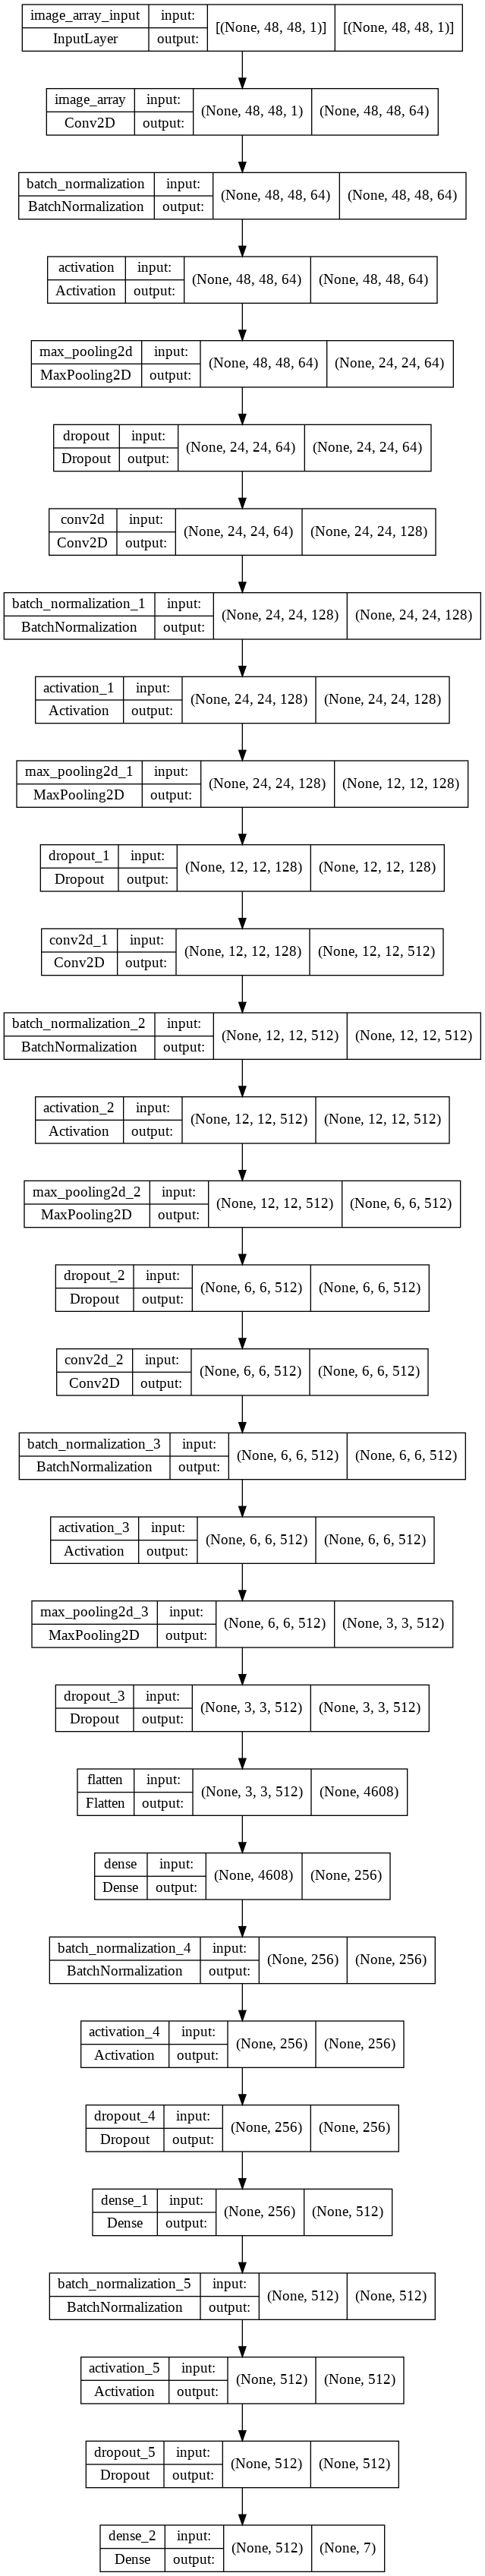

In [ ]:
# Plotting architecture of defined model
plot_model(CNN, to_file='CNN.png', show_shapes=True, show_layer_names=True)

**Compiling...**

In [ ]:
# Compiling the model
opt = optimizers.Adam(learning_rate=0.001) #using Adam Optimizer
CNN.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
CNN.summary() #gives the information about the architecture and configuration of the neural network.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_array (Conv2D)        (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 128)       2

## **Training CNN**

In [ ]:
# Setting no. of epochs
epoch_number= 100

In [ ]:
#model parameter for taining the model
early_stop = EarlyStopping('val_loss', patience=100)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=25, min_lr=0.00001,model='auto')
trained_models_path = base_path + 'cnn'
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

A **callback** is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc).

Too many **epochs** can lead to overfitting of the training dataset, whereas too few may result in an underfit model. 

**Early stopping** is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.

**Patience** is no of epochs with no improvement to stop training.

**ReduceLROnPlateau()** reduces learning rate when metric has stopped improving.

**ModelCheckpoint()** is to save keras model or model weights at some frequency.

In [ ]:
#model history for the matrics evaluation
CNN_history = CNN.fit(train_datagen.flow(X_train, y_train, batch_size),
          steps_per_epoch=len(X_train) / batch_size, 
          epochs=epoch_number, 
          verbose=1, 
          callbacks=callbacks,
          validation_data=(X_valid,y_valid))

Epoch 1/100
898/897 [==============================] - ETA: 0s - loss: 1.8653 - accuracy: 0.2559
Epoch 1: val_loss improved from inf to 1.73237, saving model to models/cnn.01-0.32.hdf5
897/897 [==============================] - 45s 48ms/step - loss: 1.8653 - accuracy: 0.2559 - val_loss: 1.7324 - val_accuracy: 0.3178 - lr: 0.0010
Epoch 2/100
898/897 [==============================] - ETA: 0s - loss: 1.6234 - accuracy: 0.3613
Epoch 2: val_loss improved from 1.73237 to 1.39963, saving model to models/cnn.02-0.46.hdf5
897/897 [==============================] - 42s 47ms/step - loss: 1.6234 - accuracy: 0.3613 - val_loss: 1.3996 - val_accuracy: 0.4639 - lr: 0.0010
Epoch 3/100
898/897 [==============================] - ETA: 0s - loss: 1.4578 - accuracy: 0.4364
Epoch 3: val_loss improved from 1.39963 to 1.30900, saving model to models/cnn.03-0.50.hdf5
897/897 [==============================] - 42s 47ms/step - loss: 1.4578 - accuracy: 0.4364 - val_loss: 1.3090 - val_accuracy: 0.5004 - lr: 0.0010

**Here we get the accuracy around 70%, which is greater than MbileNet. So we will save the CNN model to local machine and ue it for further operations.**

**Saving the model**

In [ ]:
#Save best Model
CNN.save('the_final_model.h5')

**Loading the saved model**

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('the_final_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_array (Conv2D)        (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 128)       2

In [ ]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
CNN.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

my_model
assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_array (Conv2D)        (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 128)       2

## **Accuracy & Loss Curves**

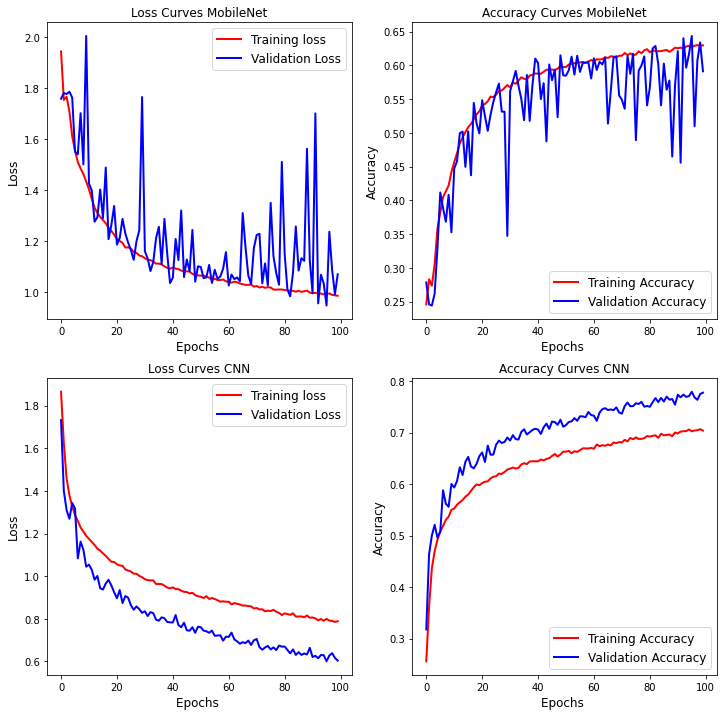

In [ ]:
#Plotting accuaracy and loss curves for all models
fig,axes=plt.subplots(2,2,figsize=(12,12))

for (m,history), ax in zip({'MobileNet':mobile_history,'CNN':CNN_history}.items(),axes):
  # Loss Curves
  ax[0].plot(history.history['loss'],'r',linewidth=2.0)
  ax[0].plot(history.history['val_loss'],'b',linewidth=2.0)
  ax[0].legend(['Training loss', 'Validation Loss'],fontsize=12)
  ax[0].set_xlabel('Epochs ',fontsize=12)
  ax[0].set_ylabel('Loss',fontsize=12)
  ax[0].set_title('Loss Curves '+m,fontsize=12)

  # Accuracy Curves
  ax[1].plot(history.history['accuracy'],'r',linewidth=2.0)
  ax[1].plot(history.history['val_accuracy'],'b',linewidth=2.0)
  ax[1].legend(['Training Accuracy', 'Validation Accuracy'],fontsize=12)
  ax[1].set_xlabel('Epochs ',fontsize=12)
  ax[1].set_ylabel('Accuracy',fontsize=12)
  ax[1].set_title('Accuracy Curves '+m,fontsize=12)

In above graphs we can see that MobieNet has more fluctuations in between training and validation in both loss and accuracy curves. 

But in CNN we can see that both training and validation curves are parallel to each other.

In CNN we are able to lower the losses and also achieved a good accuracy than MobileNet.

### **Confusion Matrix**

In [ ]:
#all the models that is used stored in model_name variable
model_name=['MobileNet','Custom CNN']
iter_=0

In [ ]:
#Classification Reports for all model
for model in [mobile_model,CNN]:
    ypred=model.predict(X_test)
    ypred_=np.argmax(ypred, axis=1)
    ytest_=np.argmax(y_test, axis=1)
    print(model_name[iter_])
    print("\n")
    print(classification_report(ytest_, ypred_,digits=3))
    iter_=iter_+1

MobileNet


              precision    recall  f1-score   support

           0      0.374     0.784     0.506       991
           1      0.778     0.167     0.275       126
           2      0.472     0.335     0.392      1000
           3      0.817     0.842     0.829      1850
           4      0.501     0.560     0.529      1216
           5      0.907     0.365     0.521       772
           6      0.700     0.451     0.548      1223

    accuracy                          0.586      7178
   macro avg      0.650     0.500     0.514      7178
weighted avg      0.643     0.586     0.582      7178

Custom CNN


              precision    recall  f1-score   support

           0      0.723     0.760     0.741       991
           1      0.929     0.825     0.874       126
           2      0.798     0.509     0.621      1000
           3      0.920     0.923     0.921      1850
           4      0.695     0.697     0.696      1216
           5      0.828     0.870     0.848       772

**Here we can see for CNN model we have far better accuracy that MobileNet model, around 78% on testing data.**

# **Testing using live cam**

**Importing necessary libraries for testing using live webcam**

In [ ]:
# Import Libaraires 

from IPython.display import display, Javascript, Image,clear_output
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

**Saving the model in json format along with wieights**

In [ ]:
# Saving model in json format along with weights
fer_json = CNN.to_json()  
with open("fer.json", "w") as json_file:  
    json_file.write(fer_json)  
CNN.save_weights("fer.h5")

In [ ]:
# Initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

**Converting Javascript object into Opencv**

In [ ]:
# Function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# Function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

**Face detect function**

In [ ]:
# Defining function to detect face
def face_detect():
  import cv2
  from PIL import Image
  import numpy as np
  import os
  from keras.models import load_model
  from time import sleep
  from keras.preprocessing.image import img_to_array
  from keras.preprocessing import image
# start streaming video from webcam
  video_stream()
# label for video
  label_html = 'Capturing...'
# initialze bounding box to empty
  bbox = ''
  count = 0
  face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') # Face Detection
  classifier =load_model('/content/the_final_model.h5')  #Load model
  emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise'] 

  while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
      break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,0),2)
      roi_gray = gray[y:y+h,x:x+w]
      roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)  ##Face Cropping for prediction
      if np.sum([roi_gray])!=0:
        roi = roi_gray.astype('float')/255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi,axis=0) ## reshaping the cropped face image for prediction
        prediction = classifier.predict(roi)[0]   #Prediction
        label=emotion_labels[prediction.argmax()]
        label_position = (x,y)
        cv2.putText(bbox_array,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)   # Text Adding
      else:
        cv2.putText(bbox_array,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)

    



    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

### **Calling the function**

In [ ]:
face_detect()

### **Output**

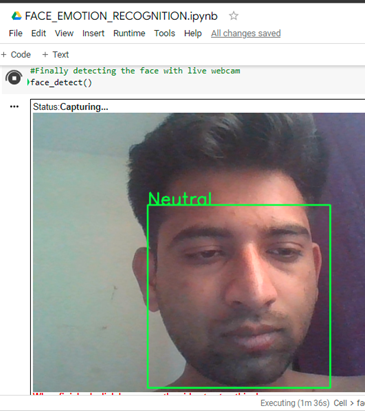

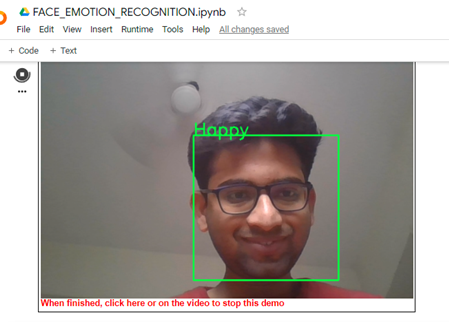

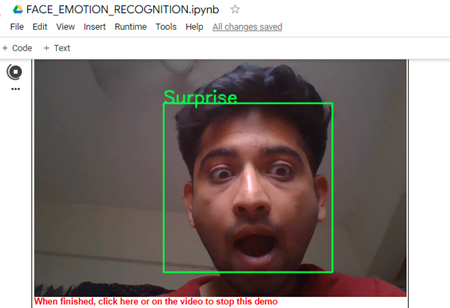

## **Conclusion**

**1. After understanding of problem statement, I get the dataset from kaggle which is FER 2013 in csv format.**

**2. After EDA, I prepared image data for model building.**

**3. Used two models, one is MobileNet and other is Convolutional Neural Network (i.e. CNN).**

**4. I choose the CNN model as it has high training and testing accuracy than MobileNet and also it shows on Loss & Accuracy curves that CNN is better than MobileNet.**

**5. I saved the model and used to prdeict facial emotions.**

**6. Since dataset has a very less number of images for 'disgust', it dosen't trained well on this emotion and hardly predict it.**

**7. After that for streamlit application, I created several files on my github repository like procfile, requirement, runtime, setup, package,etc.**

**8. Then using my github repository, I created Streamlit app for demo purpose.**

**9. Then I dployed this app on Heroku which is cloud application platform.**


## **Challenges Faced**

**1. For deep learning models we need high computational power, that was one of my challenges I faced during this project.**

**2. It failed a lot of time during model training due to high number of epoch.**

**3. After training and evaluation, faced problem while saving the model.**

**4. Then while creating streamlit app, I struggled to create appropriate pipelines to fetch the data, so the application was keep throwing error.**

**5. During deployment on Heroku platform it was unable to push my repository as slug size was exceeding, so that part also was a challenge to me to reduce the slug size below 500 MB.**

**6. Due to high slug size(481 MB) on Heroku it runs slighly slow as compare to streamlit app.**

## **Future Scope**

**1. We can train more powerfull and accurate models with high computational powers.**

**2. We can get more data, so we can train even better.**

**3. We can reduce slug size while deploying on heroku, so that it can run faster.**

# **Thank You....!**